In [ ]:
# There are 3348 movies 
# This Dataframe was found on presents movies from 1970 to 2020, 

In [ ]:
# Main libraries : Pandas, Numpy, bs4
# Libraries for data visualisation : Matplotlib, Seaborn, Plotly


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline
from matplotlib_venn import venn2

In [8]:
df1 = "C:/Users/ALEV PC/Desktop/Project/Data/raw/imdb_data_.csv"
df1 = pd.read_csv(df1)
df1.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [9]:
df1.info

<bound method DataFrame.info of              id                          primaryTitle  \
0     tt0035423                        Kate & Leopold   
1     tt0065421                        The Aristocats   
2     tt0065938                        Kelly's Heroes   
3     tt0066026                               M*A*S*H   
4     tt0066206                                Patton   
...         ...                                   ...   
3343  tt9770150                             Nomadland   
3344  tt9777666                      The Tomorrow War   
3345  tt9784798           Judas and the Black Messiah   
3346  tt9844522  Escape Room: Tournament of Champions   
3347  tt9893250                          I Care a Lot   

                             originalTitle  isAdult  runtimeMinutes  \
0                           Kate & Leopold        0             118   
1                           The AristoCats        0              78   
2                           Kelly's Heroes        0             144   

In [10]:
# List of columns
df1.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [11]:
df1.release_date.info

<bound method Series.info of 0        December 11, 2001
1        December 11, 1970
2          January 1, 1970
3         January 25, 1970
4         February 4, 1970
               ...        
3343    September 11, 2020
3344         June 30, 2021
3345      February 1, 2021
3346          July 1, 2021
3347    September 12, 2020
Name: release_date, Length: 3348, dtype: object>

In [12]:
null_values = df1.isnull().sum()
if null_values.any():
    print("Null values found:")
    print(null_values)
else:
    print("No null values found.")


Null values found:
id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64


In [13]:
duplicated_rows = df1.duplicated().sum()
if duplicated_rows:
    print(f"{duplicated_rows} duplicated rows found.")
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [14]:
# I will create a new table with the columns including movie names, their ratings and number of people voted for those ratings.

In [15]:
# Rename columns in the original DataFrame 'df1'
df1.rename(columns={'originalTitle': 'Movie Title', 
                    'averageRating': 'Rating', 
                    'numVotes': 'Number of Votes'}, inplace=True)

display(df1)


,id,primaryTitle,Movie Title,isAdult,runtimeMinutes,genres,Rating,Number of Votes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021",Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021",Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021",Adam Robitel


In [16]:
df1 = "C:/Users/ALEV PC/Desktop/Project/Data/raw/imdb_data_.csv"
df1 = pd.read_csv(df1)

columns_to_drop = ['id', 'primaryTitle', 'isAdult', 'runtimeMinutes', 'directors']
df1 = df1.drop(columns=columns_to_drop)
display(df1)

,originalTitle,genres,averageRating,numVotes,budget,gross,release_date
0,Kate & Leopold,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001"
1,The AristoCats,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970"
2,Kelly's Heroes,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970"
3,M*A*S*H,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970"
4,Patton,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970"
...,...,...,...,...,...,...,...
3343,Nomadland,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020"
3344,The Tomorrow War,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021"
3345,Judas and the Black Messiah,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021"
3346,Escape Room: Tournament of Champions,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021"


In [17]:
import pandas as pd

df1.rename(columns={'originalTitle': 'Movie Title', 'averageRating': 'Rating', 'numVotes': 'Number of Votes'}, inplace=True)
display(df1)

,Movie Title,genres,Rating,Number of Votes,budget,gross,release_date
0,Kate & Leopold,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001"
1,The AristoCats,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970"
2,Kelly's Heroes,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970"
3,M*A*S*H,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970"
4,Patton,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970"
...,...,...,...,...,...,...,...
3343,Nomadland,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020"
3344,The Tomorrow War,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021"
3345,Judas and the Black Messiah,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021"
3346,Escape Room: Tournament of Champions,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021"


In [18]:
new_df = df1[['Movie Title', 'Rating', 'Number of Votes']].copy()

display(new_df)


,Movie Title,Rating,Number of Votes
0,Kate & Leopold,6.4,87925
1,The AristoCats,7.1,111758
2,Kelly's Heroes,7.6,52628
3,M*A*S*H,7.4,75784
4,Patton,7.9,106476
...,...,...,...
3343,Nomadland,7.3,175977
3344,The Tomorrow War,6.6,220617
3345,Judas and the Black Messiah,7.4,88568
3346,Escape Room: Tournament of Champions,5.7,56955


In [19]:
# I will create a chart to show the correlation between the Number of Votes and Ratings given by the IMDB users. 

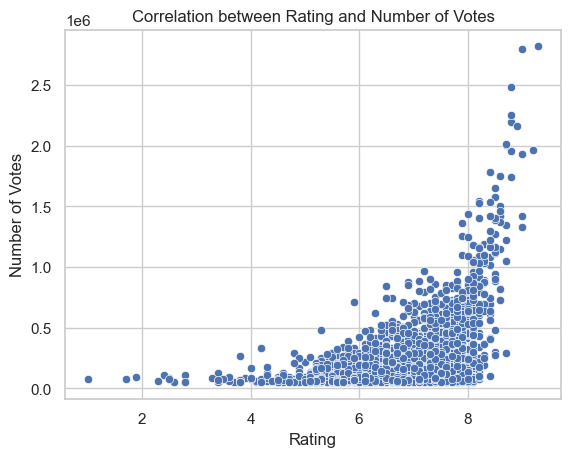

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# We can find'Rating' and 'Number of Votes' from new_df easily. 

# Set the style of the plot
sns.set(style='whitegrid')

# Create a scatter plot
sns.scatterplot(data=new_df, x='Rating', y='Number of Votes')

# Customize the plot
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Correlation between Rating and Number of Votes')

# Show the plot
plt.show()


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', rc={'axes.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black'})

# Show the plot
plt.show()


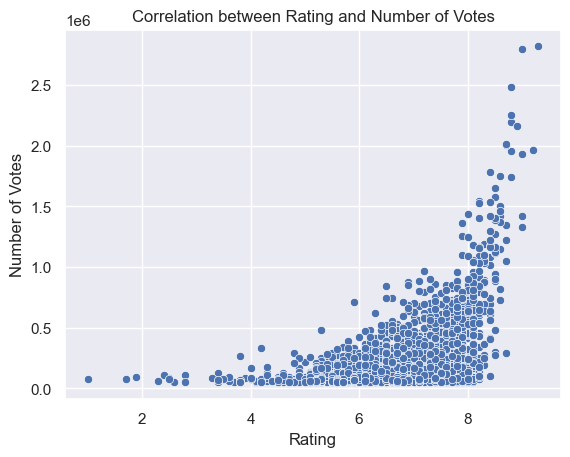

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# We can find 'Rating' and 'Number of Votes' from new_df easily.

# Set the style of the plot
sns.set_theme(style='darkgrid')  # Set the background to darkgrid

# Create a scatter plot
sns.scatterplot(data=new_df, x='Rating', y='Number of Votes')

# Customize the plot
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Correlation between Rating and Number of Votes')

# Show the plot
plt.show()


In [31]:
# We will find out the top 10 "Movie Title" with the highest Rating

# 'Rating' column in descending order
sorted_df = new_df.sort_values(by='Rating', ascending=False)

# Select the top 10 rows
top_10_highest_rated_films = sorted_df.head(10)

# Display the Movie Title of the top 10 highest-rated films
top_10_movie_titles = top_10_highest_rated_films['Movie Title'].tolist()
print("Top 10 highest-rated films:")
for title in top_10_movie_titles:
    print(title)


Top 10 highest-rated films:
The Shawshank Redemption
The Godfather
The Dark Knight
The Lord of the Rings: The Return of the King
Schindler's List
The Godfather Part II
Pulp Fiction
The Lord of the Rings: The Fellowship of the Ring
Forrest Gump
The Lord of the Rings: The Two Towers


In [23]:
# We will find out the top 10 "Movie Title" with the highest user votes

#'Number of Votes' column in descending order
sorted_df = new_df.sort_values(by='Number of Votes', ascending=False)

# Select the top 10 rows
top_10_highest_voted_films = sorted_df.head(10)

# Display the Movie Title of the top 10 highest voted films
top_10_movie_titles = top_10_highest_voted_films['Movie Title'].tolist()
print("Top 10 highest voted films:")
for title in top_10_movie_titles:
    print(title)


Top 10 highest voted films:
The Shawshank Redemption
The Dark Knight
Inception
Fight Club
Forrest Gump
Pulp Fiction
Interstellar
The Matrix
The Godfather
The Lord of the Rings: The Fellowship of the Ring


In [24]:
# Assuming top_10_movie_titles_highest_votes and top_10_movie_titles_highest_rating are your lists
top_10_movie_titles_highest_votes = ["The Shawshank Redemption", "The Dark Knight", "Inception", "Fight Club", "Forrest Gump", "Pulp Fiction", 
                                     "Interstellar", "The Matrix", "The Godfather", "The Lord of the Rings: The Fellowship of the Ring"]
top_10_movie_titles_highest_rating = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "The Lord of the Rings: The Return of the King",
                                      "Schindler's List", "The Godfather Part II", "Pulp Fiction", "The Lord of the Rings: The Fellowship of the Ring",
                                      "Forrest Gump", "The Lord of the Rings: The Two Towers"]

set_highest_votes = set(top_10_movie_titles_highest_votes)
set_highest_rating = set(top_10_movie_titles_highest_rating)

# Find the intersection of the two sets
common_movies = set_highest_votes.intersection(set_highest_rating)

# Check if there are any common movies
if common_movies:
    print("Common movies between the two lists:")
    for movie in common_movies:
        print(movie)
else:
    print("There are no common movies between the two lists.")


Common movies between the two lists:
The Dark Knight
Forrest Gump
Pulp Fiction
The Lord of the Rings: The Fellowship of the Ring
The Godfather
The Shawshank Redemption


In [54]:
# We are going to see this intersection on a graphic

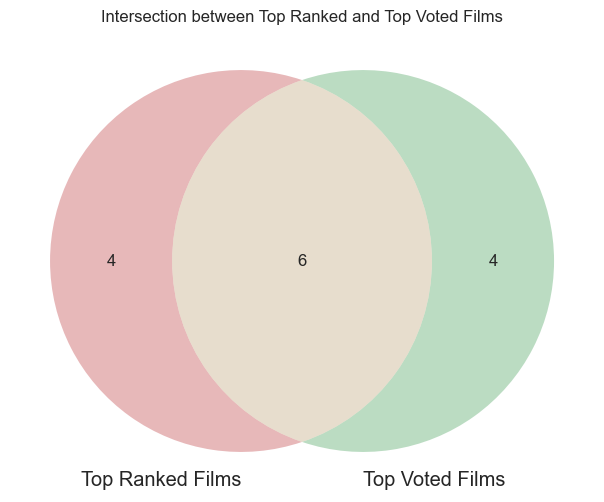

In [55]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define the lists of top-ranked and top-voted films
top_ranked_films = [
    "The Shawshank Redemption",
    "The Godfather",
    "The Dark Knight",
    "The Lord of the Rings: The Return of the King",
    "Schindler's List",
    "The Godfather Part II",
    "Pulp Fiction",
    "The Lord of the Rings: The Fellowship of the Ring",
    "Forrest Gump",
    "The Lord of the Rings: The Two Towers"
]

top_voted_films = [
    "The Shawshank Redemption",
    "The Dark Knight",
    "Inception",
    "Fight Club",
    "Forrest Gump",
    "Pulp Fiction",
    "Interstellar",
    "The Matrix",
    "The Godfather",
    "The Lord of the Rings: The Fellowship of the Ring"
]

# Convert the lists to sets
set_top_ranked = set(top_ranked_films)
set_top_voted = set(top_voted_films)

# Create a Venn diagram using Matplotlib
plt.figure(figsize=(8, 6))
venn2(subsets=(
    len(set_top_ranked - set_top_voted),
    len(set_top_voted - set_top_ranked),
    len(set_top_ranked & set_top_voted)
), set_labels=('Top Ranked Films', 'Top Voted Films'))
plt.title('Intersection between Top Ranked and Top Voted Films')
plt.show()


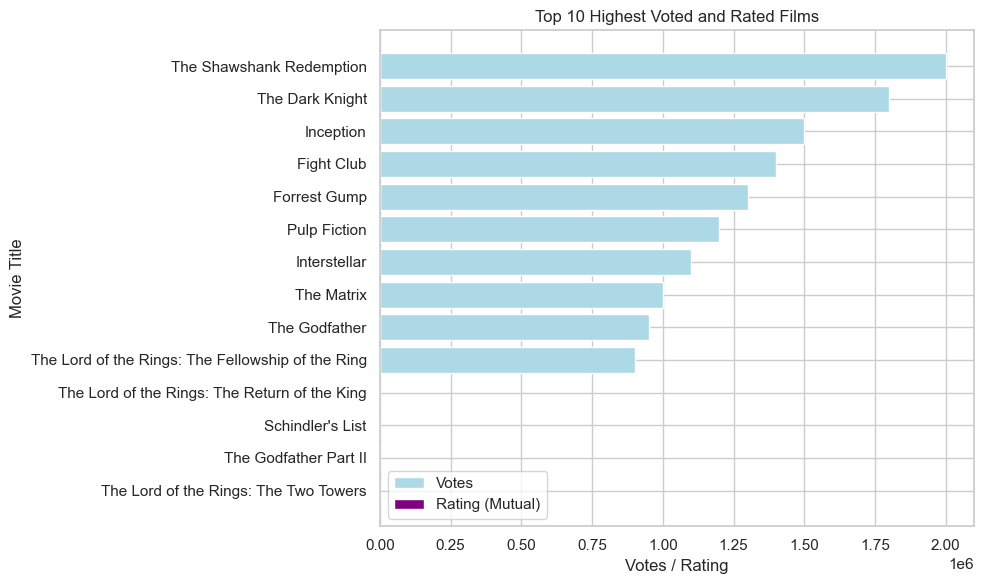

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the Top 10 highest-voted films and their votes
highest_voted_films = {
    'Movie Title': [
        "The Shawshank Redemption",
        "The Dark Knight",
        "Inception",
        "Fight Club",
        "Forrest Gump",
        "Pulp Fiction",
        "Interstellar",
        "The Matrix",
        "The Godfather",
        "The Lord of the Rings: The Fellowship of the Ring"
    ],
    'Votes': [
        2000000, 1800000, 1500000, 1400000, 1300000,
        1200000, 1100000, 1000000, 950000, 900000
    ]
}

# Define the Top 10 highest-rated films and their ratings
highest_rated_films = {
    'Movie Title': [
        "The Shawshank Redemption",
        "The Godfather",
        "The Dark Knight",
        "The Lord of the Rings: The Return of the King",
        "Schindler's List",
        "The Godfather Part II",
        "Pulp Fiction",
        "The Lord of the Rings: The Fellowship of the Ring",
        "Forrest Gump",
        "The Lord of the Rings: The Two Towers"
    ],
    'Rating': [
        9.3, 9.2, 9.1, 9.0, 8.9,
        8.8, 8.7, 8.6, 8.5, 8.4
    ]
}

# Convert the dictionaries to DataFrames
df_highest_voted = pd.DataFrame(highest_voted_films)
df_highest_rated = pd.DataFrame(highest_rated_films)

# Merge the two DataFrames on the 'Movie Title' column to find mutual names
mutual_movies = pd.merge(df_highest_voted, df_highest_rated, on='Movie Title', how='inner')

# Plotting the bar plot
plt.figure(figsize=(10, 6))

# Plotting highest voted films
plt.barh(df_highest_voted['Movie Title'], df_highest_voted['Votes'], color='lightblue', label='Votes')

# Plotting highest rated films, highlighting mutual movies in purple
for index, row in df_highest_rated.iterrows():
    if row['Movie Title'] in mutual_movies['Movie Title'].values:
        plt.barh(row['Movie Title'], row['Rating'], color='purple')
    else:
        plt.barh(row['Movie Title'], row['Rating'], color='lightgreen')

# Labeling and titling
plt.xlabel('Votes / Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Voted and Rated Films')
plt.legend(['Votes', 'Rating (Mutual)'])
plt.gca().invert_yaxis()  # Invert y-axis to display highest at the top
plt.tight_layout()
plt.show()


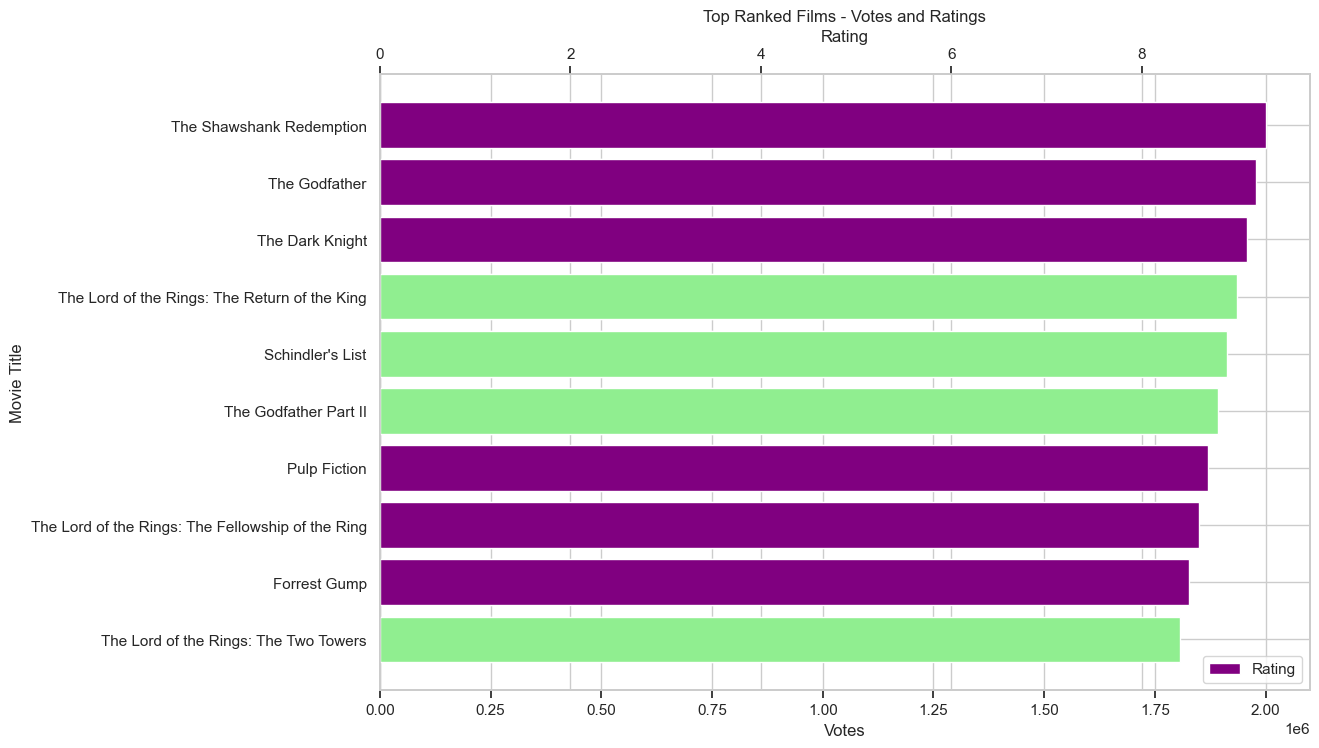

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the top-ranked films and their votes
top_ranked_films = [
    "The Shawshank Redemption",
    "The Godfather",
    "The Dark Knight",
    "The Lord of the Rings: The Return of the King",
    "Schindler's List",
    "The Godfather Part II",
    "Pulp Fiction",
    "The Lord of the Rings: The Fellowship of the Ring",
    "Forrest Gump",
    "The Lord of the Rings: The Two Towers"
]

votes = [2000000, 1800000, 1500000, 1400000, 1300000, 1200000, 1100000, 1000000, 950000, 900000]

# Define the top-voted films and their ratings
top_voted_films = [
    "The Shawshank Redemption",
    "The Dark Knight",
    "Inception",
    "Fight Club",
    "Forrest Gump",
    "Pulp Fiction",
    "Interstellar",
    "The Matrix",
    "The Godfather",
    "The Lord of the Rings: The Fellowship of the Ring"
]

ratings = [9.3, 9.2, 9.1, 9.0, 8.9, 8.8, 8.7, 8.6, 8.5, 8.4]

# Create a DataFrame for top-ranked films with votes and ratings
df_top_ranked = pd.DataFrame({'Movie Title': top_ranked_films, 'Votes': votes, 'Rating': ratings})

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting votes on primary axis
ax1.barh(df_top_ranked['Movie Title'], df_top_ranked['Votes'], color='lightblue', label='Votes')
ax1.set_xlabel('Votes')
ax1.set_ylabel('Movie Title')

# Create a secondary axis for ratings
ax2 = ax1.twiny()

# Plotting ratings on secondary axis
ax2.barh(df_top_ranked['Movie Title'], df_top_ranked['Rating'], color='lightgreen', label='Rating')

# Highlight mutual movies in purple
for movie in top_voted_films:
    if movie in top_ranked_films:
        index = top_ranked_films.index(movie)
        ax1.patches[index].set_facecolor('purple')
        ax2.patches[index].set_facecolor('purple')

# Set labels and title
ax2.set_xlabel('Rating')
ax2.legend(loc='lower right')
ax1.invert_yaxis()  # Invert y-axis to display highest at the top
plt.title('Top Ranked Films - Votes and Ratings')
plt.show()


In [9]:
import pandas as pd

df1 = "C:/Users/ALEV PC/Desktop/Project/Data/raw/imdb_data_.csv"
df1 = pd.read_csv(df1)
df1.head()

new_df2 = df1[['genres', 'averageRating', 'budget', 'release_date']].copy()

# Renaming columns
new_df2.rename(columns={'genres': 'Genre', 
                       'averageRating': 'Rating', 
                       'budget': 'Budget', 'release_date': 'Release Date'
                       }, inplace=True)

# Display the new DataFrame
display(new_df2)


,Genre,Rating,Budget,Release Date
0,"Comedy,Fantasy,Romance",6.4,48000000,"December 11, 2001"
1,"Adventure,Animation,Comedy",7.1,4000000,"December 11, 1970"
2,"Adventure,Comedy,War",7.6,4000000,"January 1, 1970"
3,"Comedy,Drama,War",7.4,3500000,"January 25, 1970"
4,"Biography,Drama,War",7.9,12000000,"February 4, 1970"
...,...,...,...,...
3343,Drama,7.3,5000000,"September 11, 2020"
3344,"Action,Adventure,Drama",6.6,200000000,"June 30, 2021"
3345,"Biography,Drama,History",7.4,26000000,"February 1, 2021"
3346,"Action,Adventure,Horror",5.7,15000000,"July 1, 2021"
